# Linear Regression Topic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Transformed_Housing_Data2.csv")
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
sale_price=data["Sale_Price"].head(30)
flat_area=data['Flat Area (in Sqft)'].head(30)
sample_data=pd.DataFrame({'sale_price':sale_price, 'flat_area':flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


<function matplotlib.pyplot.show(close=None, block=None)>

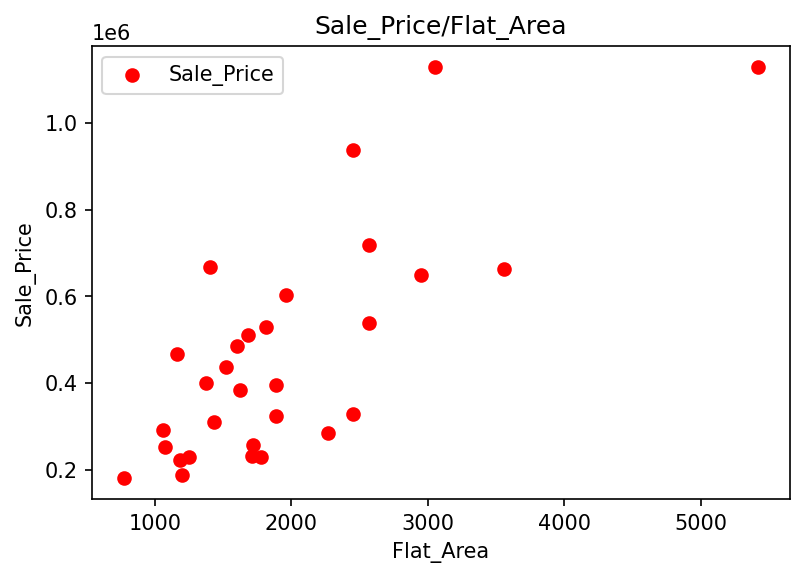

In [4]:
plt.figure (dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red', label='Sale_Price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title('Sale_Price/Flat_Area')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

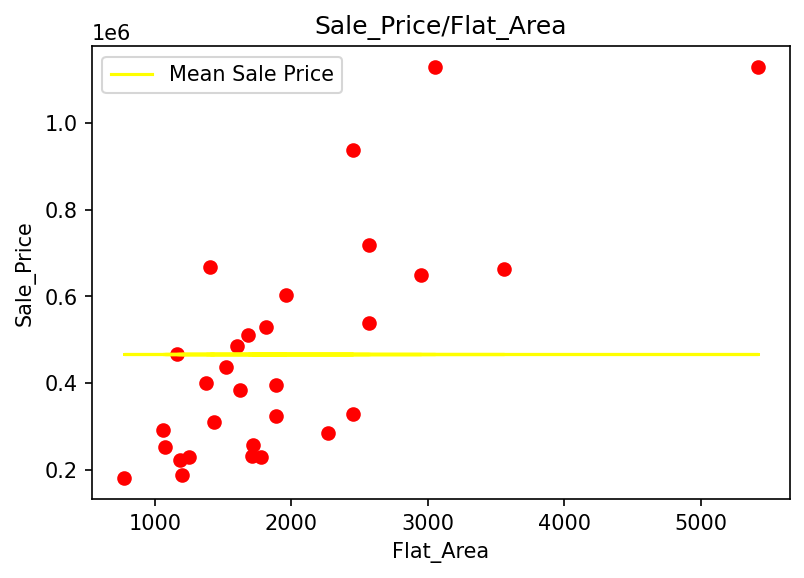

In [5]:
sample_data['mean_sale_price']=sample_data.sale_price.mean()

plt.figure (dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color='yellow',label='Mean Sale Price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title('Sale_Price/Flat_Area')
plt.legend()
plt.show

Text(0.5, 1.0, 'Slope0With MSE281372081125.0')

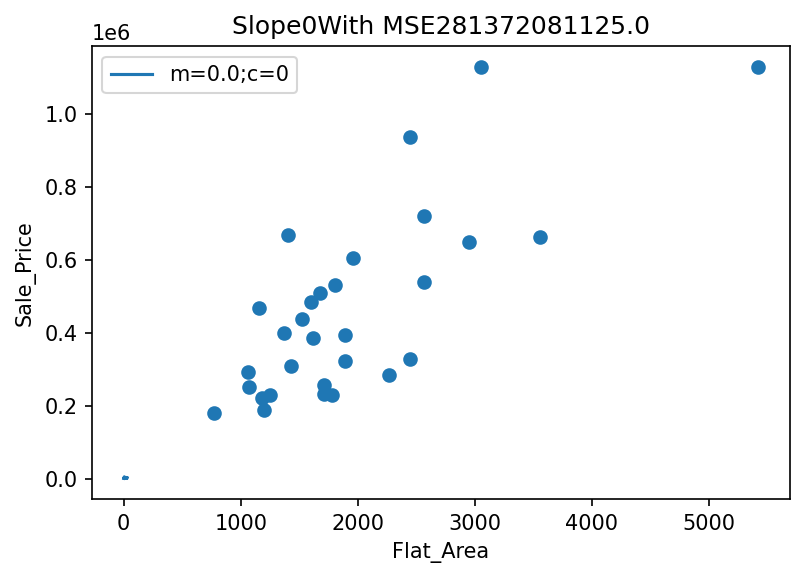

In [6]:
# cost function curve
from sklearn.metrics import mean_squared_error
c=0
m=0

line=[]

for i in range (len(sample_data)):
    line.append(sample_data.flat_area[i]*m+c)

plt.figure (dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area,label='m=0.0;c=0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE= mean_squared_error(sample_data.sale_price,line)
plt.title("Slope"+str(m)+"With MSE"+str(MSE))

Text(0.5, 1.0, 'Slope50 With MSE 184728400708.33334')

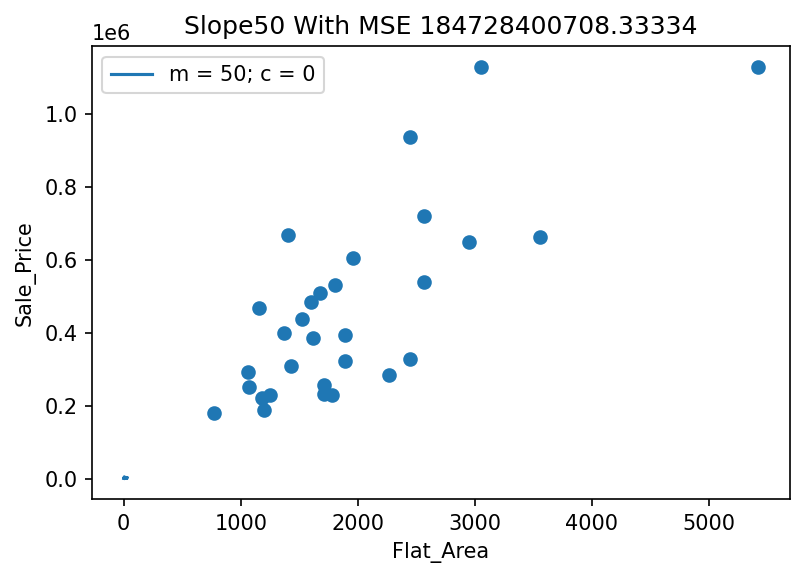

In [7]:
c=0
m=50

line=[]

for i in range (len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)

plt.figure (dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area,label='m = 50; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE= mean_squared_error(sample_data.sale_price,line)
plt.title("Slope"+ str(m)+" With MSE "+ str(MSE))

In [8]:
def slope_Error(slope, intercept, sample_data):
    sale=[]
    for i in range (len(sample_data.flat_area)):
        tmp=sample_data.flat_area[i]* slope + intercept
        sale.append(tmp)
    MSE= mean_squared_error(sample_data.sale_price,sale)
    return MSE

In [9]:
slope=[i/10 for i in range (0,5000)]
Cost=[]
for i in slope:
    cost= slope_Error(slope=i, intercept=0, sample_data=sample_data)
    Cost.append(cost)

In [10]:
#Arranging in Dataframe

Cost_table = pd.DataFrame({
    'slope':slope,
    'Cost':Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


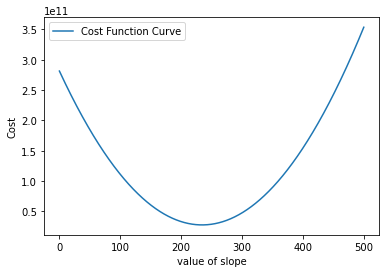

In [11]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label='Cost Function Curve')
plt.xlabel('value of slope')
plt.ylabel('Cost')
plt.legend()

In [12]:
new_slope=Cost_table['slope'][Cost_table['Cost']==Cost_table['Cost'].min()].values
new_slope[0]

234.3

In [13]:
def intercept_Error(slope, intercept, sample_data):
    sale=[]
    for i in range (len(sample_data.flat_area)):
        tmp=sample_data.flat_area[i]* slope + intercept
        sale.append(tmp)
    MSE= mean_squared_error(sample_data.sale_price,sale)
    return MSE

In [14]:
intercept=[i/10 for i in range (5000,50000)]
Cost=[]
for i in intercept:
    cost= intercept_Error(slope=234, intercept=i, sample_data=sample_data)
    Cost.append(cost)

In [15]:
#Arranging in Dataframe

Cost_table = pd.DataFrame({
    'intercept': intercept,
    'Cost':Cost
})
Cost_table.tail()

,intercept,Cost
44995,4999.5,2.779911e+10
44996,4999.6,2.779911e+10
44997,4999.7,2.779911e+10
44998,4999.8,2.779911e+10
44999,4999.9,2.779911e+10


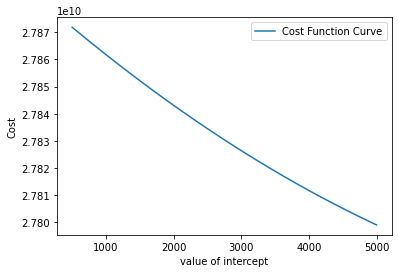

In [16]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label='Cost Function Curve')
plt.xlabel('value of intercept')
plt.ylabel('Cost')
plt.legend()

In [17]:
new_intercept=Cost_table['intercept'][Cost_table['Cost']==Cost_table['Cost'].min()].values
new_intercept[0]

4999.9

# gradient function

In [18]:
def param_init(y):
    '''
    y=target variable
    returns initialized values of m and c
    '''
    m=0.1
    c=y.mean()
    return m,c

In [21]:
def param_init(m,c,x):
    '''
    x=independent variable
    returns prediction generated by line with parameters m,c
    '''
    prediction=[]
    for x in x:
        pred=(m*x)+c
        prediction.append(pred)
        return prediction

In [22]:
def compute_cost(prediction,y):
    '''
    return mean_squared_error between prediction and y
    '''
    cost=np.sum(((prediction-y)++2)/len(y))
    return cost

In [23]:
def gradients(prediction,y):
    '''
    returns Gradients corresponding to m and c
    '''
    n = len(y)
    Gm = 2/n*np.sum((prediction-y)*x)
    Gc = 2/n+np.sum((prediction-y))
    return Gm, Gc

In [24]:
def param_update(m_old, c_old, Gm_old, Gc_old, alpha):
    '''
    Update and return the new values of m and c
    '''
    m_new= m_old-alpha*Gm_old
    c_new = c_old-alpha*Gc_old
    return m_new, c_new

In [25]:
def result(m, c, x, y , cost, prediction, i):
    '''
    Print and plot final result obtained from gradient descent
    '''
    ##if the gradient descent coveraged to the optimum value before max_iter
    if i<max_iter-1:
        print("***** Gradient Descent has Coveraged at iteration{}*****".format(i))
    else:
        print("***** Result after", max_inter,'interation is:****************')
        
    ## plotting the final result
    plt.figure(figsize=(14,7), dpi=120)
    plt.scatter(x, y, color ='red', label ='data ponts')
    label= 'final regression line:m={}; c={}'.format(str(m),str(c))
    plt.plot(x, prediction, color='green', label=lebal)
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.title('fina _regression line')
    plt.legend()